# Milestone 5 (Kivy Mobile App Deployment)

Name : Rinashini a/p Arunasalam Sukormaru  
Matric ID : WQD170077 (17013672/1)    
Github Link :  https://github.com/RinashiniA/WQD7005-Group

# Installing Kivy and it's required packages. These are run in the terminal. 

python -m pip install kivy  
python -m pip install pygame  
python -m pip install --upgrade pip wheel setuptools
garden install graph
garden install matplotlib

In [1]:
# Importing libraries 

import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
# Getting the cleaned Crudeoil Price dataset

df = pd.read_csv(r'dataset_cleaned.csv',
                 index_col=['Date'])
print(df)

            Closing Price   Open  Daily High  Daily Low
Date                                                   
29/05/2020          35.49  33.68       35.77      32.36
28/05/2020          33.71  32.10       34.21      31.14
27/05/2020          32.81  34.14       34.32      31.75
26/05/2020          34.35  33.30       34.81      32.48
22/05/2020          33.25  33.95       34.00      30.72
...                   ...    ...         ...        ...
09/02/2006          62.62  62.68       63.73      62.38
08/02/2006          62.55  62.96       63.44      62.29
07/02/2006          63.09  64.82       64.90      62.81
06/02/2006          65.11  66.35       66.50      64.77
03/02/2006          65.37  64.77       65.48      63.93

[3669 rows x 4 columns]


In [3]:
# Obtaining information about the dataset
df.info()

#Removing the blank spaces between column names so that they can be called easily 
df.columns = df.columns.str.strip().str.replace(" ", "").str.lstrip()

# Choosing the closing price column for time series analysis
df1 = df[['ClosingPrice']]

# Reindexing the dataset to reverse the order of the data from the latest price at the top of the dataset to the oldest price at the top of the dataset 
df2 = df1.iloc[::-1]

<class 'pandas.core.frame.DataFrame'>
Index: 3669 entries, 29/05/2020 to 03/02/2006
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  3669 non-null   float64
 1   Open           3669 non-null   float64
 2   Daily High     3669 non-null   float64
 3   Daily Low      3669 non-null   float64
dtypes: float64(4)
memory usage: 143.3+ KB


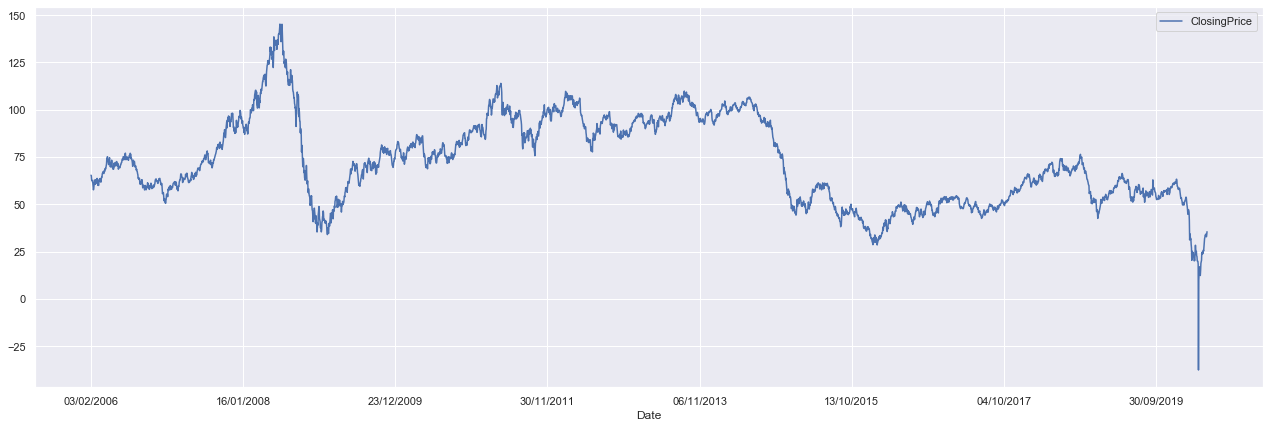

In [4]:
# Plotting the graph of WTI crude oil prices from 03/02/2006 until 29/05/2020

sns.set(rc={'figure.figsize':(22, 7)})
fig1 = df2.plot()

In [5]:
# Fitting the dataset into Arima(2,2,10) model. 
# This sets the lag value to 2 for autoregression, uses a difference order of 2 to make the time series stationary, and uses a moving average model of 10.

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df2['ClosingPrice'], order=(2, 2, 10))  
results_ARIMA = model.fit(disp=-1)
arima_pred = results_ARIMA.predict(df2['ClosingPrice'].index[3000], df2['ClosingPrice'].index[-1], typ="levels")


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [6]:
# Recent Predictions (for the year of 2020)

arima_pred_2020 = results_ARIMA.predict(df2['ClosingPrice'].index[3566], df2['ClosingPrice'].index[-1], typ="levels")

In [7]:
# Recent Predictions (for the month of April 2020)

arima_pred_April = results_ARIMA.predict(df2['ClosingPrice'].index[3628], df2['ClosingPrice'].index[-22], typ="levels")

In [8]:
# Recent Predictions (for the month of May 2020)

arima_pred_May = results_ARIMA.predict(df2['ClosingPrice'].index[3649], df2['ClosingPrice'].index[-1], typ="levels")

In [9]:
# To set the config that kivy will not be run in full screen mode

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

[INFO   ] [Logger      ] Record log in /Users/rinashiniarunasalam/.kivy/logs/kivy_20-06-19_34.txt
[INFO   ] [Kivy        ] v2.0.0rc3, git-Unknown, 20200617
[INFO   ] [Kivy        ] Installed at "/opt/anaconda3/lib/python3.7/site-packages/kivy/__init__.py"
[INFO   ] [Python      ] v3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
[INFO   ] [Python      ] Interpreter at "/opt/anaconda3/bin/python"
[INFO   ] [Factory     ] 185 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_pygame, img_pil (img_ffpyplayer, img_gif ignored)
[INFO   ] [Text        ] Provider: pygame
[INFO   ] [Window      ] Provider: pygame
[WARNING] [Deprecated  ] Pygame has been deprecated and will be removed after 1.11.0: Call to deprecated function __init__ in /opt/anaconda3/lib/python3.7/site-packages/kivy/core/window/window_pygame.py line 42.Called from /opt/anaconda3/lib/python3.7/site-packages/kivy/core/__init__.py line 70 by core_select_lib().
[INF

# Developing the Kivy Mobile App

In [ ]:
# Steps and Process on developing the Kivy mobile application 

from kivy.app import App
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.properties import ObjectProperty

from kivy.garden.matplotlib.backend_kivyagg import FigureCanvasKivyAgg
import matplotlib.pyplot as plt


class Main(Screen):
    pass


class Time(Screen):
    bar = ObjectProperty(None)

    def on_pre_enter(self, *args):
        plt.clf()
        sns.set(rc={'figure.figsize':(22, 7)})
        df2.plot()
        plt.xlabel('Date')
        plt.ylabel('WTI crude oil prices')
        plt.title('Graph of WTI crude oil prices from 03/02/2006 until 29/05/2020')
        plt.legend()
        self.bar.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        
class Time2(Screen):
    bar = ObjectProperty(None)

    def on_pre_enter(self, *args):
        plt.clf()
        plt.plot(df2.ClosingPrice, label='Original')
        plt.plot(arima_pred, label='Prediction')
        plt.legend(loc=2)
        plt.title('Graph of Overall WTI Crude Oil Time Series Forecasting with RMSE: %.4f'% np.sqrt(sum((arima_pred-df2.ClosingPrice[3000:])**2)/len(df2.ClosingPrice[3000:])))
        self.bar.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        
class Time3(Screen):
    bar = ObjectProperty(None)

    def on_pre_enter(self, *args):
        plt.clf()
        plt.plot(df2.ClosingPrice[3566:], label='Original')
        plt.plot(arima_pred_2020, label='Prediction')
        plt.legend(loc=1)
        plt.title('Graph of WTI Crude Oil Time Series Forecasting for the year 2020 with RMSE: %.4f'% np.sqrt(sum((arima_pred_2020-df2.ClosingPrice[3566:])**2)/len(df2.ClosingPrice[3566:])))
        self.bar.add_widget(FigureCanvasKivyAgg(plt.gcf()))

class Time4(Screen):
    bar = ObjectProperty(None)

    def on_pre_enter(self, *args):
        plt.clf()
        plt.plot(df2.ClosingPrice[3628:3648], label='Original')
        plt.plot(arima_pred_April, label='Prediction')
        plt.legend(loc=1)
        plt.title('Graph of WTI Crude Oil Time Series Forecasting for the month of April 2020 with RMSE: %.4f'% np.sqrt(sum((arima_pred_April-df2.ClosingPrice[3628:3648])**2)/len(df2.ClosingPrice[3628:3648])))
        self.bar.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        
class Time5(Screen):
    bar = ObjectProperty(None)

    def on_pre_enter(self, *args):
        plt.clf()
        plt.plot(df2.ClosingPrice[3649:], label='Original')
        plt.plot(arima_pred_May, label='Prediction')
        plt.legend(loc=1)
        plt.title('Graph of WTI Crude Oil Time Series Forecasting for the month of May 2020 with RMSE: %.4f'% np.sqrt(sum((arima_pred_May-df2.ClosingPrice[3649:])**2)/len(df2.ClosingPrice[3649:])))
        self.bar.add_widget(FigureCanvasKivyAgg(plt.gcf()))
        
class Manager(ScreenManager):
    pass


class TimeseriesApp(App):
    title = "Time Series Forecasting Kivy App"

    def build(self):
        return Manager()


if __name__ == "__main__":
    TimeseriesApp().run()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
